# import nedded libraries 

In [92]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# Read_Data

In [93]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [94]:
df.shape

(8807, 12)

In [95]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Data preprocessing

## Data cleaning 

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [97]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [98]:
df.duplicated().sum()

0

In [99]:
nan_counts = df.isnull().sum()
nan_precebtage = (nan_counts/len(df))*100
nan_precebtage

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [100]:
df['director']=df['director'].fillna('director not specified')
df['director'].value_counts()

director
director not specified            2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [101]:
df['cast']=df['cast'].fillna('cast not specified')
df['cast'].value_counts()

cast
cast not specified                                                                                                                                                                            825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                         

In [102]:
df['country']=df['country'].fillna('The country is unknown')

In [103]:
duration_values= df['duration'].str.extract('([^\d]+)', expand=False).str.strip()
duration_values.value_counts()

duration
min        6128
Season     1793
Seasons     883
Name: count, dtype: int64

# Exploratory data analysis (EDA)

In [104]:
x = df['rating'].value_counts()
x

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [105]:
pie = px.pie(x,values=x.values,names=x.index ,title="Distribution of content ratings on Netflix")
pie.show()

In [106]:
directors_list = pd.DataFrame()
directors_list = df['director'].str.split(',',expand=True).stack()
directors_list = directors_list.to_frame()
directors_list

,,0
0,0,Kirsten Johnson
1,0,director not specified
2,0,Julien Leclercq
3,0,director not specified
4,0,director not specified
...,...,...
8802,0,David Fincher
8803,0,director not specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [107]:
directors_list.columns=['Director']
directors_list

,,Director
0,0,Kirsten Johnson
1,0,director not specified
2,0,Julien Leclercq
3,0,director not specified
4,0,director not specified
...,...,...
8802,0,David Fincher
8803,0,director not specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [108]:
directors = directors_list.groupby(["Director"]).size().reset_index(name ='Total count')
directors = directors[directors.Director!='director not specified']
directors = directors.sort_values(by=['Total count'],ascending = False)
top_10_directors = directors.head(10)
top_10_directors

,Director,Total count
4020,Rajiv Chilaka,22
4067,Raúl Campos,18
261,Jan Suter,18
4651,Suhas Kadav,16
3235,Marcus Raboy,16
2450,Jay Karas,15
1382,Cathy Garcia-Molina,13
2447,Jay Chapman,12
3306,Martin Scorsese,12
5074,Youssef Chahine,12


In [109]:
top_10_directors = top_10_directors.sort_values(by=["Total count"],ascending=True)
bar_char = px.bar(data_frame=top_10_directors,x='Total count' ,y='Director',title="Total 10 Directors on Netflix " )
bar_char

In [110]:
cast_list = pd.DataFrame()
cast_list = df['cast'].str.split(',',expand=True).stack()
cast_list = cast_list.to_frame()
cast_list.columns = ['Actors']
cast_list 

Actors
0    0      cast not specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [111]:
cast = cast_list.groupby(['Actors']).size().reset_index(name ='Total count')
cast = cast[cast['Actors']!='cast not specified']
cast = cast.sort_values(by=['Total count'],ascending = False)
cast 

,Actors,Total count
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
...,...,...
15290,João Côrtes,1
15289,João Assunção,1
15288,Joziah Lagonoy,1
15287,Jozef Gjura,1


In [112]:
Top_5_Actors = cast.head()
Top_5_Actors = Top_5_Actors.sort_values(by=['Total count'])
Actors_chart = px.bar(data_frame=Top_5_Actors,x='Total count',y='Actors',title = "top 10 Actors on Netflix " )
Actors_chart.show()

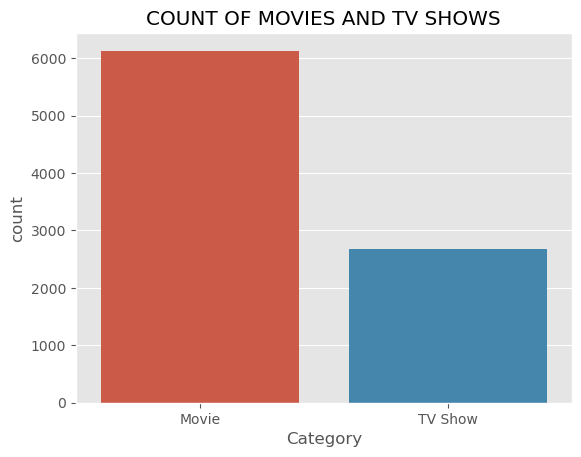

In [113]:
sns.countplot(data=df ,x='type')
plt.title("COUNT OF MOVIES AND TV SHOWS")
plt.xlabel("Category")
plt.show()

In [114]:
Movies = df[df['type']=='Movie']
df_movie = Movies.groupby('release_year')["type"].count()
df_movie = df_movie.to_frame().reset_index()
df_movie = df_movie.rename(columns ={"type":"total count"})
movies_char  = px.line(df_movie,x= 'release_year',y='total count',title='Number of Movies Released')
movies_char 

In [115]:
Tv_Show = df[df['type']=='TV Show']
df_Tv_Show = Tv_Show.groupby('release_year')["type"].count()
df_Tv_Show = df_Tv_Show.to_frame().reset_index()
df_Tv_Show = df_Tv_Show.rename(columns ={"type":"total count"})
Tv_char = px.line(df_Tv_Show,x= 'release_year',y='total count',title='Number of Tv_Shows Released')
Tv_char.show() 

In [116]:
countries = df[df["country"]!="he country is unknown"]
country =countries["country"].value_counts().reset_index()
country = country.head()
top_country = px.bar(data_frame=country,x='country',y='count',color='country')
top_country

In [117]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast not specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",The country is unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,director not specified,cast not specified,The country is unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,director not specified,cast not specified,The country is unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [118]:
duration=df["duration"].value_counts().reset_index()
country = country.head()
top_country = px.bar(data_frame=country,x='country',y='count',color='country')
top_country

In [119]:
Movies.dropna(subset='duration',axis=0,inplace=True)

In [120]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6128 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6128 non-null   object
 1   type          6128 non-null   object
 2   title         6128 non-null   object
 3   director      6128 non-null   object
 4   cast          6128 non-null   object
 5   country       6128 non-null   object
 6   date_added    6128 non-null   object
 7   release_year  6128 non-null   int64 
 8   rating        6126 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6128 non-null   object
 11  description   6128 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.4+ KB


In [121]:
Topduration = Movies['duration'].value_counts().reset_index()
Top_Duration = Topduration
movies_Duration =px.bar(data_frame=Top_Duration, x="duration" ,y="count" ,title="Distribution of movie time")
movies_Duration.show()

In [122]:
duration_values= Movies['duration'].str.extract('([^\d]+)', expand=False).str.strip()
duration_values.value_counts()

duration
min    6128
Name: count, dtype: int64

In [123]:
Movies['duration'] = Movies['duration'].str.replace(' min', '').astype(float)

In [124]:
data = Movies[["country","duration"]]
data['country'] = data['country'].str.split(', ')
data = data.explode('country')
average_duration = data.groupby('country')['duration'].mean().reset_index()
average_duration =average_duration[average_duration["country"]!="The country is unknown"]

In [125]:
five_lowest_countries = average_duration.sort_values(by=["duration"])
five_lowest_countries=five_lowest_countries.head()
five_lowest_countries

,country,duration
105,Syria,52.0
114,"United Kingdom,",62.0
53,Kazakhstan,67.0
110,Uganda,68.0
39,Guatemala,68.0


In [126]:
# fig = go.Figure(data=[go.Pie(labels=five_lowest_countries['country'], values=five_lowest_countries['duration'], hole=.4)])
# fig.show()
fig = go.Figure([go.Bar(x=five_lowest_countries["country"], y=five_lowest_countries["duration"])])

fig.update_layout(
    title='The five countries with the shortest average film duration',
    xaxis_title='Countries',
    yaxis_title='Duration',
    )

In [127]:
Movies['rating'].value_counts()

rating
TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

In [128]:
Egypt_Movies=Movies[Movies["country"]=="Egypt"]
Egypt_Movies=Egypt_Movies.rating.value_counts()
Egypt_Movies

rating
TV-14    61
TV-MA    26
TV-PG     4
TV-G      1
Name: count, dtype: int64

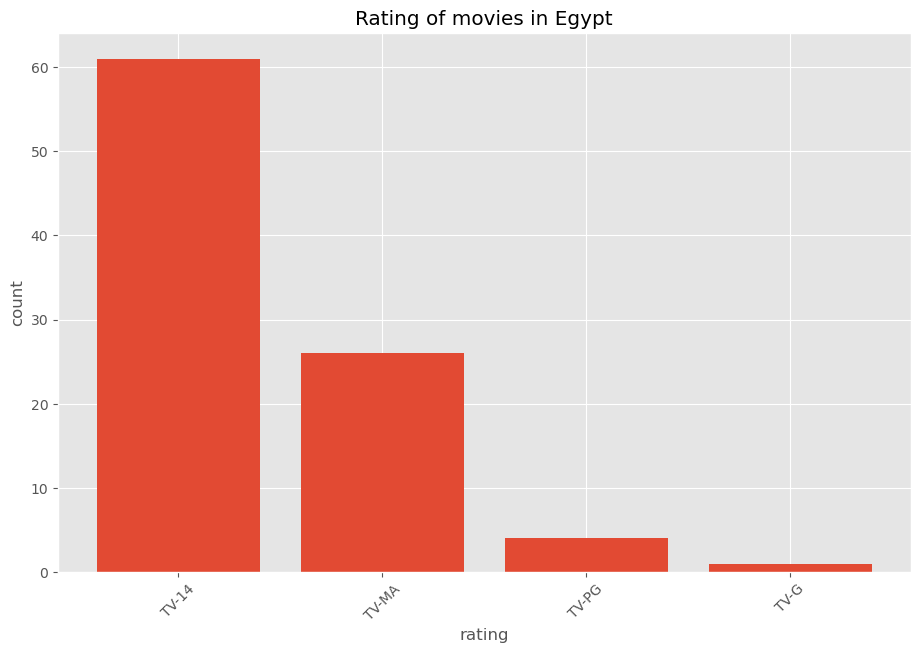

In [129]:
plt.figure(figsize=(11,7))
plt.style.use('ggplot')
plt.bar(Egypt_Movies.index , Egypt_Movies.values)
plt.title("Rating of movies in Egypt")
plt.xlabel("rating")
plt.ylabel("count")
plt.xticks(rotation = 45)
plt.show()

In [138]:
Movies["country"].unique()

array(['United States', 'The country is unknown',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'Germany, Czech Republic', 'India', 'United States, India, France',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Japan', 'Nigeria',
       'Spain, United States', 'France', 'United Kingdom, United States',
       'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Canada', 'Hong Kong', 'United States, China, Hong Kong',
       'Italy, United States', 'United States, Germany',
       'United Kingdom, Canada, United Sta

In [142]:
countries_str = "Algeria, Bahrain, Comoros, Djibouti, Egypt, Iraq, Jordan, Kuwait, Lebanon, Libya, Mauritania, Morocco, Oman, Palestine, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, the United Arab Emirates, Yemen"
arab_countries = countries_str.split(", ")
arab_countries

['Algeria',
 'Bahrain',
 'Comoros',
 'Djibouti',
 'Egypt',
 'Iraq',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Mauritania',
 'Morocco',
 'Oman',
 'Palestine',
 'Qatar',
 'Saudi Arabia',
 'Somalia',
 'Sudan',
 'Syria',
 'Tunisia',
 'the United Arab Emirates',
 'Yemen']

In [143]:
arab_countries = Movies[Movies["country"].isin(arab_countries)]
arab_countries


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
436,s437,Movie,The Tambour of Retribution,Abdulaziz Alshlahei,"Faisal Al Dokhei, Adwa Fahad, Muhand Alsaleh, ...",Saudi Arabia,"July 19, 2021",2021,TV-14,91.0,"Dramas, International Movies, Romantic Movies","In an impoverished neighborhood, the son of a ..."
529,s530,Movie,Return of the Prodigal Son,Youssef Chahine,"Majida El Roumi, Souheir El Morshidy, Shoukry ...",Egypt,"July 6, 2021",1976,TV-MA,124.0,"Dramas, International Movies","Freed after spending 12 years in jail, a man's..."
635,s636,Movie,Here Comes the Rain,Bahij Hojeij,"Hassan Mrad, Julia Kassar, Carmen Lebbos, Diam...",Lebanon,"June 25, 2021",2010,TV-MA,101.0,"Dramas, International Movies",Abducted during the Lebanese Civil War and now...
859,s860,Movie,Asmaa,Amr Salama,"Hend Sabry, Maged El-Kidwani, Hany Adel, Sayed...",Egypt,"May 20, 2021",2011,TV-14,92.0,"Dramas, International Movies","Constantly denied medical treatment, an HIV po..."
991,s992,Movie,One Like It,Marwan Nabil,"Riham Abdel Ghafour, Mohammed Aly Rizk, Hazem ...",Egypt,"April 23, 2021",2020,TV-G,15.0,"Dramas, Independent Movies, International Movies",This short film follows a day in the life of a...
...,...,...,...,...,...,...,...,...,...,...,...,...
8528,s8529,Movie,The Thief and the Imbecile,"Mohammed El-Tahawy, Mohamed Mostafa","Khaled El Sawy, Khaled Saleh, Ruby",Egypt,"June 6, 2019",2013,TV-14,96.0,"Dramas, International Movies",A street beggar befriends a man who lost his e...
8550,s8551,Movie,The Walls of the Moon,"Ossama Abu El Atta, Tarek Al Eryan","Mona Zaki, Asser Yassin, Amr Saad, Salwa Mohammed",Egypt,"April 18, 2019",2015,TV-14,98.0,"Action & Adventure, Dramas, International Movies","After losing her eyesight in an accident, a wo..."
8663,s8664,Movie,Unruly Friends,Sherif Mandour,"Kinda Allouch, Ahmed Salah Al-Saadany, Dina Fo...",Egypt,"June 20, 2019",2011,TV-14,83.0,"International Movies, Thrillers",A young woman discovers that familial and psyc...
8666,s8667,Movie,Used Goods,Mohamed Hamdy,"Mohamed Ragab, Ayten Amer, Hassan Abdulfattah",Egypt,"September 1, 2019",2018,TV-14,95.0,"Action & Adventure, Comedies, International Mo...","To evade greedy pharmaceutical crooks, a medic..."


In [137]:
arab_countries["country"].value_counts()

country
Egypt           92
Lebanon          9
Saudi Arabia     5
Kuwait           4
Name: count, dtype: int64

<Figure size 1500x1000 with 0 Axes>

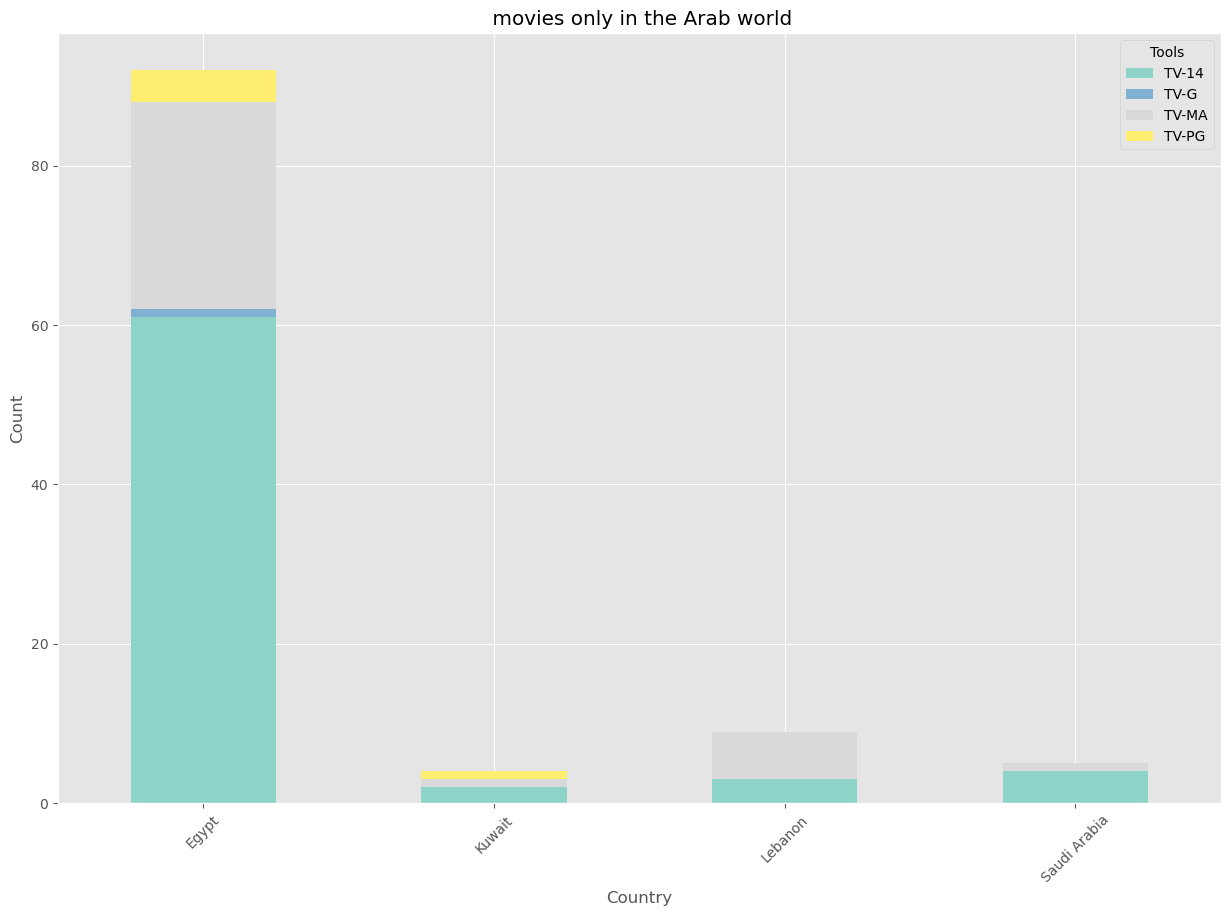

In [146]:
country_count = arab_countries.groupby('country')['rating'].value_counts().unstack()
plt.figure(figsize=(15, 10))
country_count.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='Set3')
plt.title(' movies only in the Arab world')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Tools')
plt.show()